# Gillespie Exploratory Data Analysis - 10+ Years of Quantified Self Data

This Jupyter notebook (will) introduce and explore data pulled from my long-running personal quantified self project - aka my "Data Journal".

## Background - The Data Journal
Data Journal is a system I built to help me keep track of stuff that happens in my life. Its form has changed greatly over the past decade, but its function has remained the same: to house data about things I do. It’s a default place to make note of things that might not otherwise have a place. I’ve tracked lots of different things over the years.

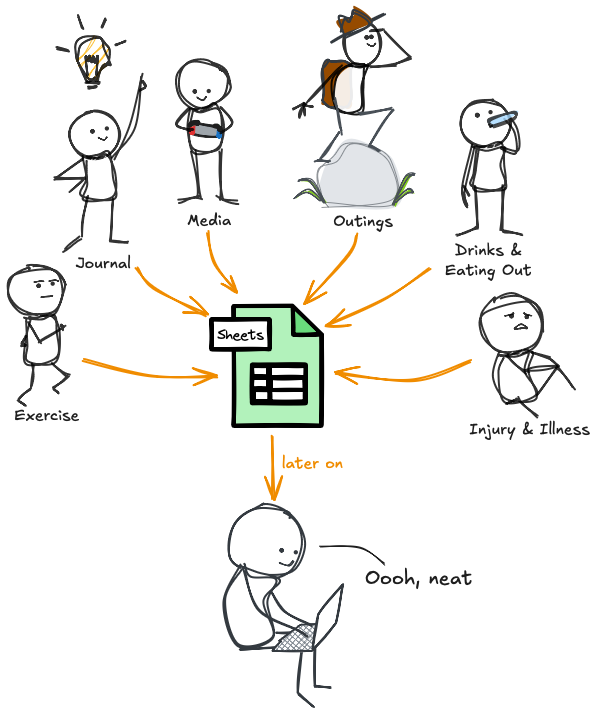

My Data Journal allows me to answer questions like:

- “When did this pain in my back start?”
- “How many workouts have I done this year?”
- “When was the last time I hung out with this person?”
- “How many drinks have I had the past few weeks?”
- “Have I eaten out more or exercised more this month?”
- “Have I met this goal I set for myself?” 

### What I'm Tracking Now

This list has been honed over time. I've tracked everything on this list since at January 1st 2020, and several things dating way way before that (dating back to 2013). I track these things because they've proven themselves either useful or amusing enough to continue being noted.

- **Workouts**
	- `Name` - title of workout or short description
	- `Type` - one of strength/cardio/mobility
	- `Note` - comment field, usually about how the workout went
- **Pains**
	- `Pains` - comma separated list of symptoms
	- `Treatments` - comma separated list of medicines/therapies
	- `Note` - what happened, or general place to complain
- **Media**
	- `Type` - one of book/movie/TV/Videogame
	- `Title` - of the piece of media
	- `First Time` - yes or no, is this my first time with this piece of media?
- **Outings**
	- `Type` - comma separated list of various tags, e.g. eating out, seeing friends, etc
	- `Where` - name of place visited
	- `Note` - usually how it went or why we're there
- **Quotes**
	- `Quote` - what was said
	- `Quoter` - who said it
	- `Note` - any additional context
- **Events**
	- `Event` - a catch-all for any time-based thing I want to make note of - e.g. "replaced hot water heater"
- **Daily Things**
	- `Summary` - A brief description of the day. What I did. Who I saw. How it went.
	- `Health` - 1-to-10 how healthy do I feel?
	- `Satisfaction`  - 1-to-10 how satisfied am I with the day?
	- `Bedtime` - time of night falling asleep
	- `Wake` - time of morning waking
	- `Sleep Duration` - duration between the above
	- `Sleep Location` - city & state I'm located at at 3:30 AM
	- `Work Status` - one of Weekend/At Work/WFH/Holiday/Sick/Vacation
- **Weekly**
	- Formulas summarizing all of the above
- **Monthly**
	- Formulas summarizing all of the above
- **Quarterly**
	- Formulas summarizing all of the above
- **Yearly**
	- Formulas summarizing all of the above
	- `Big Event` - it seems like every year has one, they mark the passage of time
	- `Podcast Listen Time` - Hours 
	- `YouTube View Count` - per Google Takeout
	- `Puzzle Box` - name of my annual puzzle box

Looks like a lot, and it probably is, but I've made capture very easy. All of the sleep-related stuff happens automatically. Everything else is primarily entered in an ad-hoc manner via Siri Shortcuts.

> [!NOTE]
> For more information on the Data Journal, including how I built and operate it, see [my personal site](https://aarongilly.com/Pages/Data-Journal#how-to).